In [285]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


In [286]:
data=pd.read_csv('../Datasets/ejemplo2.csv')
data=data.to_numpy()
X=data[:,:1]
y=data[:,1]
m=y.shape[0]
X = np.concatenate([X, X * X, X*X*X], axis=1)

In [287]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [288]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [289]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [290]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [291]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


theta calculado por el descenso por el gradiente: [ 3603.88848656  4353.69130801   266.73727003 -3252.52291404]
edad: -87443840.50828333
edad de 50 sueldo aproximado: $4021


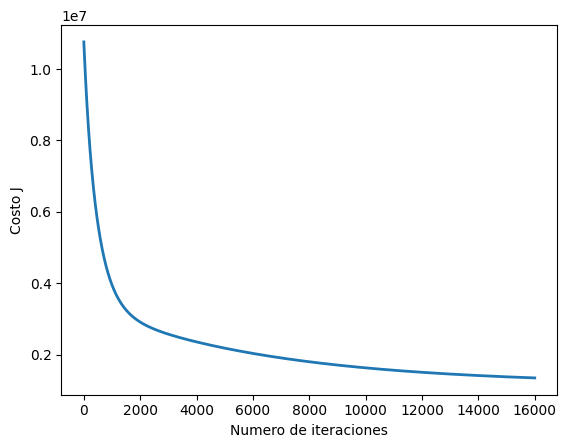

In [292]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001  # alpha = 0.003
num_iters = 16000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(4)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
edad = 30
cuadrado = edad**2
cubo=edad**3
X_array = [1, edad, cuadrado,cubo]
price = np.dot(X_array, theta)
print("edad:",price)
X_array[1:4] = (X_array[1:4] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('edad de 50 sueldo aproximado: ${:.0f}'.format(price))



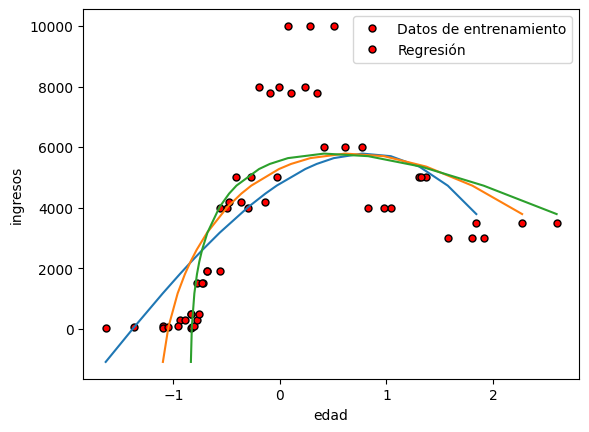

In [293]:

pyplot.plot(X[:,1:], y, 'ro', ms=5, mec='k')
pyplot.xlabel('edad')
pyplot.ylabel('ingresos')
pyplot.plot(X[:,1:], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión'])


# Ecuacion de la Normal

In [294]:
# Cargar datos
data = pd.read_csv('../Datasets/ejemplo2.csv')
data = data.to_numpy()
X = data[:, :1]
y = data[:, 1]
m = y.shape[0]
X = np.concatenate([X, X * X, X*X*X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [295]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

    return theta


In [296]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(
    str(theta)))

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios
edad=30
X_array = [1,edad,edad**2,edad**3]
price = np.dot(X_array, theta)

print('Ingresos de una persona de 50 anios de edad (usando la acuacion de la normal)${:.0f}'.format(price))


Theta calculado a partir de la ecuación de la normal: [-4.37877003e+02 -1.07167633e+02  1.32182272e+01 -1.61146179e-01]
Ingresos de una persona de 50 anios de edad (usando la acuacion de la normal)$3893


In [297]:
def plotData(x, y):
    # Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


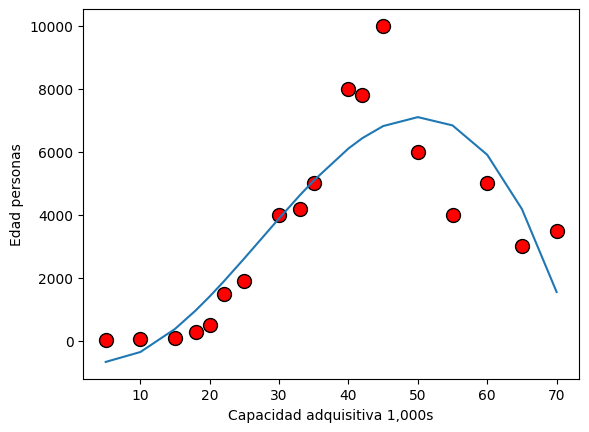

In [298]:
plotData(X[:, 1], y)
pyplot.plot(X[:,1],np.dot(X,theta),'-')